## Clustering

In [1]:
import h5py
import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import preprocessing

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

# Variable list from https://www.nbi.dk/~petersen/Teaching/ML2023/InitialProject/VariableList.html
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]
subset_variables = ['p_e233', 'p_ehad1', 'p_E5x7_Lr2', 'p_f3core', 'p_deltaPhi0', 'p_f3', 'p_eAccCluster', 'p_dPOverP']


X_train = train[all_variables][:130000]
#X_train = train[subset_variables][:130000]
y_train = train['Truth'][:130000]
X_validate = train[all_variables][130000:]
#X_validate = train[subset_variables][130000:]
y_validate = train['Truth'][130000:]

X_test = test[all_variables]
#X_test = test[subset_variables]




In [2]:

(X_train - np.mean(X_train)) / np.std(X_train)

C:\Users\Juliu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,p_pt_track,p_eta,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
0,-0.824894,-0.824894,-0.824894,-0.824894,-0.824894,-0.824894,-0.442767,-0.105438,0.005362,0.924011,...,-0.577106,0.287492,-0.437326,-0.337561,-0.569695,0.214043,-0.512394,-0.342503,-0.569538,0.217549
1,-0.136614,-0.136614,-0.136614,-0.136614,-0.136614,-0.136614,0.340719,0.414218,0.002139,-0.801067,...,1.105101,-0.169741,-0.825523,-0.325154,1.117063,-0.168549,-0.804395,-0.343982,1.118957,-0.165384
2,-0.596232,-0.596232,-0.596232,-0.596232,-0.596232,-0.596232,-0.129373,-0.105438,-0.027397,-0.788923,...,0.255533,-1.091567,-1.300525,0.188876,0.295728,-1.095192,-1.296595,0.082015,0.296776,-1.092853
3,0.016337,0.016337,0.016337,0.016337,0.016337,0.016337,-0.599465,-0.625095,0.009535,-1.018284,...,-0.612360,-0.818394,0.297891,-0.240235,-0.613300,-0.867127,0.239421,-0.245090,-0.613189,-0.864585
4,1.698798,1.698798,1.698798,1.698798,1.698798,1.698798,1.907692,1.973188,-0.038371,1.042370,...,-0.612360,0.449175,-0.096703,-0.406508,-0.613300,0.407114,-0.067438,-0.440127,-0.613189,0.410792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129995,0.933278,0.933278,0.933278,0.933278,0.933278,0.933278,0.497416,0.933875,0.006172,0.934337,...,0.004679,2.128861,0.917472,2.341744,0.039304,2.474621,1.184020,2.446529,0.040088,2.454088
129996,-0.289565,-0.289565,-0.289565,-0.289565,-0.289565,-0.289565,0.654113,-0.625095,-0.012432,-0.846273,...,0.406989,-1.323161,-0.876486,-0.247363,0.351715,-1.286808,-0.875344,-0.232334,0.352821,-1.284640
129997,0.092812,0.092812,0.092812,0.092812,0.092812,0.092812,0.340719,-0.625095,-0.012879,-1.054253,...,-0.612360,0.687861,-0.414913,-0.345486,-0.613300,0.649060,-0.401273,-0.380716,-0.613189,0.652954
129998,0.475190,0.475190,0.475190,0.475190,0.475190,0.475190,-1.069556,-0.105438,-0.015878,-0.949265,...,-0.612360,0.194147,-0.754182,-0.417846,-0.546938,0.120392,-0.793002,-0.474194,-0.546758,0.127207


In [10]:
loss_list = []
with open('Classification_JuliusFoverskov_XGBoost_VariableList.txt','r') as f:
    sorted_variables = [item.strip() for item in f]

# Only pick 5 most important features for clustering, importances optained from permutation importance
sorted_variables = sorted_variables[:5]


#for i in range(3, 51):
#    cluster_model = cluster.KMeans(n_clusters = i, random_state = 0).fit(X_train[sorted_variables])
#    loss_list.append(cluster_model.inertia_)
    
cluster_model = cluster.KMeans(n_clusters = 15, random_state = 0).fit(X_test[sorted_variables])
preds = cluster_model.predict(X_test[sorted_variables])

# Histogram of distinct clusters

0.9565144319051858

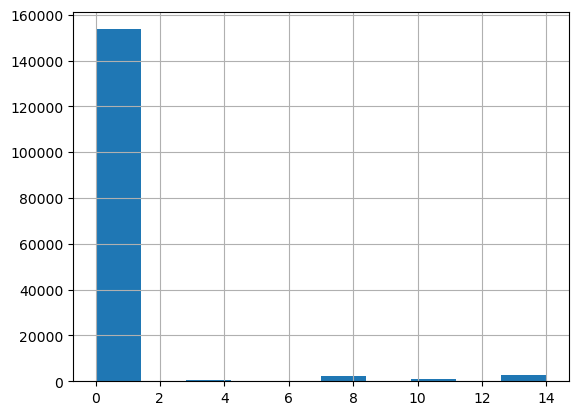

In [11]:
plt.hist(cluster_model.labels_, bins = 10)
plt.grid()

unique, counts = np.unique(cluster_model.labels_, return_counts=True)

counts[0]  / np.sum(counts)

In [ ]:
cluster_model.labels_

In [ ]:
plt.scatter(X_train["p_Rhad"], X_train["p_phiCluster"])

# Elbow plot

Inertia as a function of clusters, inertia is a of measure squared distance for each point in a cluster to their particular center.  

In [ ]:
plt.plot(loss_list, '-bo')

# kMeans on test data

In [ ]:
#cluster_model = cluster.KMeans(n_clusters = 5, random_state = 0).fit(X_test[sorted_variables])
#preds = cluster_model.predict(X_test[sorted_variables])

# Save results in a file

In [ ]:
# Write results to a file

# Probabilities of particle being an electron
with open('Clustering_JuliusFoverskov_kMeans.txt','w') as f:
    # y_test_pred col 1 = electron probability
    for index, prediction in zip(X_test.index, preds):
        f.write(f"{index}, {prediction}\n")

# List of most important features from permutation importance for electron classification
with open('Clustering_JuliusFoverskov_kMeans_VariableList.txt','w') as f:
    f.write("\n".join(map(str, sorted_variables)))

# For fun

In [ ]:
analysis = pandas.DataFrame()

analysis['truth'] = y_train

In [ ]:
analysis['pred'] = cluster_model.labels_
analysis['pred'] = analysis['pred'].apply(lambda x: int(x / x) if x != 0 else x)
analysis['truth'] = analysis['truth'].apply(lambda x: int(x))

In [ ]:
analysis

In [ ]:
# Compute the confusion matrix
confusion_matrix = np.zeros((2, 2))
for true, pred in zip(analysis['truth'], analysis['pred']):
    confusion_matrix[true][pred] += 1

# Print the confusion matrix
print(confusion_matrix)

In [ ]:
plt.imshow(confusion_matrix)

np.argwhere(analysis["truth"] == 0 & analysis["pred"] == 0)